In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [5]:
data = pd.read_csv("airline-passengers.csv", parse_dates=['Month'], index_col='Month')

In [6]:
print(data.head())
print(data.info())
print(data.describe())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


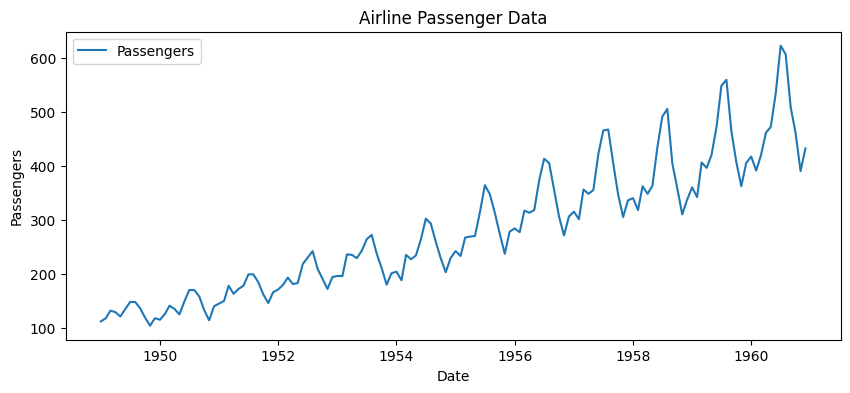

In [7]:
plt.figure(figsize=(10,4))
plt.plot(data, label="Passengers")
plt.title("Airline Passenger Data")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [8]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print(" Non-Stationary")

adf_test(data['Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
 Non-Stationary


In [9]:
data_diff = data.diff().dropna()


In [10]:
adf_test(data_diff['Passengers'])


ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
 Non-Stationary


In [11]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [12]:
model = sm.tsa.ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Tue, 16 Sep 2025   AIC                           1057.516
Time:                        14:24:28   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

In [13]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

In [15]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 6808.397034418323
MAE: 63.54531127532635
RMSE: 82.51301130378361


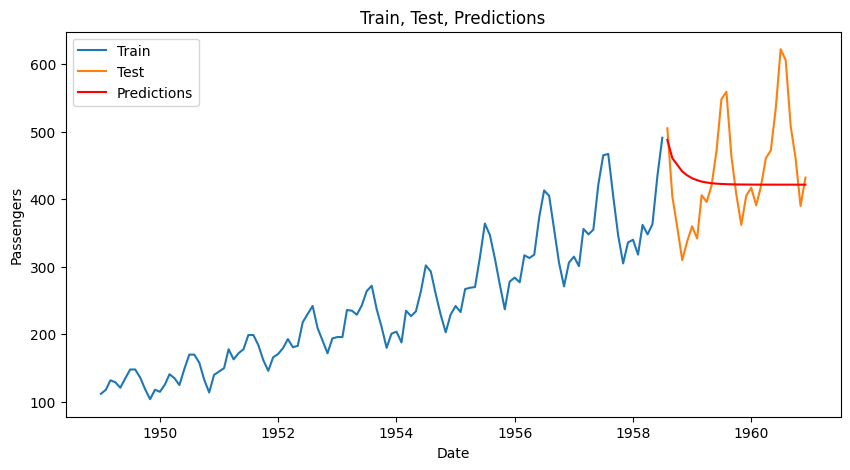

In [16]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Predictions", color="red")
plt.title("Train, Test, Predictions")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()